---
authors:
  - Hannah Niehaus
  - JR
---

(sentinel2-meltpond)=
# Melt pond fraction from Sentinel-2

## Dataset resources

The data of the operational sea ice concentration product can be downloaded via the link given below.

**Authors:** Niehaus, H. and Spreen, G.

**Year:** 2022

**Institute:** Institute of Environmental Physics, University of Bremen

**URL:** https://doi.pangaea.de/10.1594/PANGAEA.950885

**Citeable Publication:**  Niehaus, H., Spreen, G., Birnbaum, G., Istomina, L., Jäkel, E., Linhardt, F., et al. (2023). Sea ice melt pond fraction derived from Sentinel-2 data: Along the MOSAiC drift and Arctic-wide. Geophysical Research Letters, 50, e2022GL102102. https://doi.org/10.1029/2022GL102102

## General information about this notebook

This notebook series has been initiated by the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author(s) of this notebook:
- *Hannah Niehaus*, [*Institute of Environmental Physics*](http://www.iup.uni-bremen.de), *University of Bremen*, *Germany*, *niehaus@uni-bremen.de*
- *Johannes Röttenbacher*, [*Institute of Environmental Physics*](http://www.iup.uni-bremen.de), *University of Bremen*, *Germany*, *jroettenbacher@iup.physik.uni-bremen.de*

GitHub repository: https://github.com/ac3-tr/ac3-book

This notebook is licensed under the [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/ "CC-BY-4.0")

## Reading example dataset

The data set consists of multiple netCDF files.
We can access and download them using [pangaeapy](https://pypi.org/project/pangaeapy/).
For this example we are using a scene from the 19 July 2021.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import datetime as dt
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy
from pangaeapy import PanDataSet
import nest_asyncio
nest_asyncio.apply()
import xarray as xr

%matplotlib inline

In [22]:
# change this to your local data directory
cachedir = '/media/jr/JR_SSD/tmp/pangaeapy_cache'
ds = PanDataSet(950885, enable_cache=True, cachedir=cachedir)
filename = ds.download(indices=[3])

File 20210719_T45XVK_s2_mpf.nc already exists, skipping.


In [23]:
data = xr.open_dataset(filename[0])
#print(data.variables['thickness'])
mpf = data['mpf']*100
x = data['x']
y = data['y']
date = data.date
zone = int(data.zone[:-1])

## Plotting the dataset

Using the Cartopy module, the melt pond fraction can be plotted onto a map. Using Cartopy's coordinate reference system module, a utm projection is created based on the utm zone given in the netcdf file. Ocean and land masks are read in from the built-in Natural Earth API.

The extent of the data array is set to match the extent of the data. On a panarctic map the small patch of data would not be visible.

In [24]:
crs = ccrs.UTM(zone)
land110m = cartopy.feature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='None', facecolor='k')
ocean110m = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '110m', edgecolor='None', facecolor='lightgray')

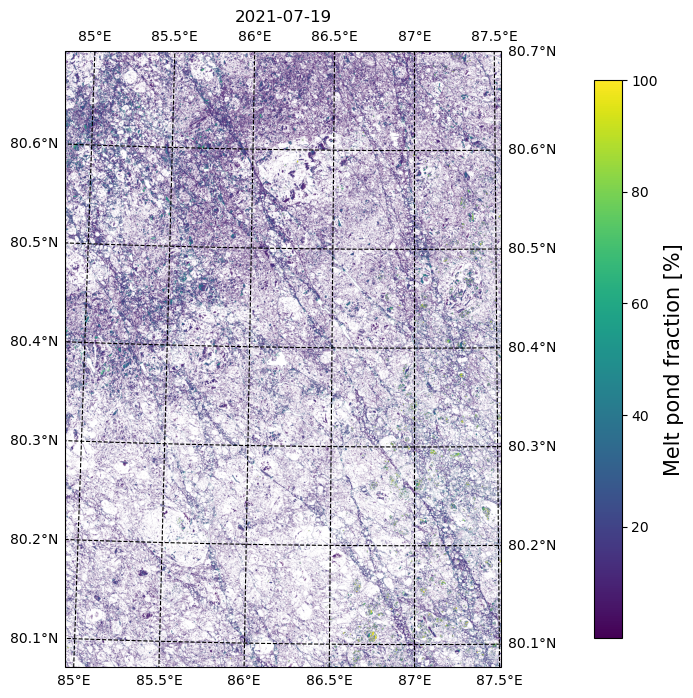

In [25]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection=crs)
ax.set_title(f'{date[:4]}-{date[4:6]}-{date[6:]}')
# we could add these feature for larger maps or swaths close to the coast
# ax.add_feature(ocean110m)
# ax.add_feature(land110m)
cmap = plt.get_cmap('viridis')
cmap.set_under(color='white')
im = ax.imshow(mpf,
               extent=[np.nanmin(x),np.nanmax(x),np.nanmin(y),np.nanmax(y)],
               zorder=2,
               vmin=0.01,  # define something slightly greater than one to mimic closed sea ice
               cmap=cmap,
               )
gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False,linestyle = '--',color='black', transform=crs)
cb = fig.colorbar(im, ax=ax, fraction=0.024, pad=0.08)
cb.set_label('Melt pond fraction [%]', fontsize=15)